# ДЗ по курсу Нейронные сети
Student: Юнусов Н.

Advisor: Боровик И.Г.

#Подготовка данных

Соединение с гугл диском

In [0]:
!pip install -U -q PyDrive

import tensorflow as tf
import timeit

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Удалить папки B и P

In [0]:
# remove files
!rm -r B/* && rm -r P/*
# remove folders
!rm -rf B && rm -rf P

Скачать изображения с гугл.диска и хранить в массиве images как объекты PIL.Image

In [0]:
from PIL import Image

rootFolderId = 'root'
dzFolderId = '1IAioGRkyqOcAl_XByITHXSyxz1UrPke5'
BFolderId = '1x6QO6PURAaawvwa2O-_DuYolI2vwLobn'
PFolderId = '1ObfmkAN6sihTUczxp_lYAV3escWzvy66'
BtestFolderId = '1J7NmNvXCuY8Z6fDVQkIATrNuuuFE1wlp'
PtestFolderId = '1WbpV6mEL-iCZyp0tK-JbwI4C_l_aKR8T'

# Создаем папки для изображений
!mkdir -p B && mkdir -p P
# !mkdir -p Btest && mkdir -p Ptest

images = []

#download B
file_list = drive.ListFile({
    'q': "'{id}' in parents and trashed=false".format(id=BFolderId)
}).GetList()
for file1 in file_list:
  # print('title: %s, id: %s' % (file1['title'], file1['id']))
  downloaded = drive.CreateFile({'id': file1['id']})
  filename = 'B/{filename}'.format(filename=file1['title'])
  downloaded.GetContentFile(filename) # Download file as 'filename.png'.
  img = Image.open(filename)
  images.append(img)

#download P
file_list = drive.ListFile({
    'q': "'{id}' in parents and trashed=false".format(id=PFolderId)
}).GetList()
for file1 in file_list:
  # print('title: %s, id: %s' % (file1['title'], file1['id']))
  downloaded = drive.CreateFile({'id': file1['id']})
  filename = 'P/{filename}'.format(filename=file1['title'])
  downloaded.GetContentFile(filename) # Download file as 'filename.png'.
  img = Image.open(filename)
  images.append(img) 

print(images)
print(len(images))

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F0ABCF8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F31BF28>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F341128>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F308B70>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F305AC8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F341C18>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38ED58DD8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F308320>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F3355C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F3417B8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA3921F4160>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38ED38DD8>, <PIL.PngImagePl

In [0]:
from PIL import Image

BtestFolderId = '1J7NmNvXCuY8Z6fDVQkIATrNuuuFE1wlp'
PtestFolderId = '1WbpV6mEL-iCZyp0tK-JbwI4C_l_aKR8T'

# Создаем папки для изображений
!mkdir -p Btest && mkdir -p Ptest

images_test = []

#download B
file_list = drive.ListFile({
    'q': "'{id}' in parents and trashed=false".format(id=BtestFolderId)
}).GetList()
for file1 in file_list:
  # print('title: %s, id: %s' % (file1['title'], file1['id']))
  downloaded = drive.CreateFile({'id': file1['id']})
  filename = 'Btest/{filename}'.format(filename=file1['title'])
  downloaded.GetContentFile(filename) # Download file as 'filename.png'.
  img = Image.open(filename)
  images_test.append(img)

#download P
file_list = drive.ListFile({
    'q': "'{id}' in parents and trashed=false".format(id=PtestFolderId)
}).GetList()
for file1 in file_list:
  # print('title: %s, id: %s' % (file1['title'], file1['id']))
  downloaded = drive.CreateFile({'id': file1['id']})
  filename = 'Ptest/{filename}'.format(filename=file1['title'])
  downloaded.GetContentFile(filename) # Download file as 'filename.png'.
  img = Image.open(filename)
  images_test.append(img) 

print(images_test)
print(len(images_test))

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F38B940>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F335588>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F3E3EF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F335668>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F08DD68>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F3E39E8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38ED3B278>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F3E33C8>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA392204780>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x900 at 0x7FA38F08DC88>]
10


Создание набора обучающих данных

In [0]:
from PIL import Image
from sklearn import *
import sklearn
import numpy as np

N = 100

# Приведение изображений к размеру 16 на 16 пикселей и формату grayscale
test_img = list(img.resize((16,16), Image.BILINEAR ) for img in images)
test_img = list(img.convert('L') for img in test_img)
pix = list(np.array(img) for img in test_img)

# Create dataset ’s element - data and target arrays
examples = list(np.around((255 - np.array( point )) /16) for point in pix)
examples = np.array(examples)
target = np.zeros((N ,), dtype =np. uint8)
target = np.array(['B']*int(N/2) + ['P']*int(N/2) )

# Create dataset
dataset = sklearn.datasets.base.Bunch(data = examples, target = target)

Создание набора тестовых данных

In [0]:
from PIL import Image
from sklearn import *
import sklearn
import numpy as np

N = 10

# Приведение изображений к размеру 16 на 16 пикселей и формату grayscale
test_img = list(img.resize((16,16), Image.BILINEAR ) for img in images_test)
test_img = list(img.convert('L') for img in test_img)
pix = list(np.array(img) for img in test_img)

# Create dataset ’s element - data and target arrays
examples = list(np.around((255 - np.array( point )) /16) for point in pix)
examples = np.array(examples)
target = np.zeros((N ,), dtype =np. uint8)
target = np.array(['B']*int(N/2) + ['P']*int(N/2)

# Create dataset
dataset_test = sklearn.datasets.base.Bunch(data = examples, target = target)

# Построение нейронной сети

Создание, обучение и тестирование нейронной сети

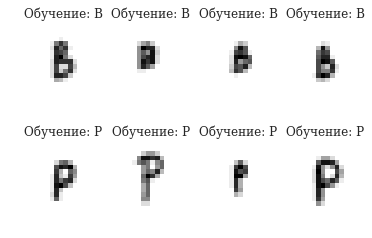

Classification  report  for  classifier  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 64, 16, 4), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):

             precision    recall  f1-score   support

          B       1.00      0.80      0.89         5
          P       0.83      1.00      0.91         5

avg / total       0.92      0.90      0.90        10


Confusion   matrix :
[[4 1]
 [0 5]]


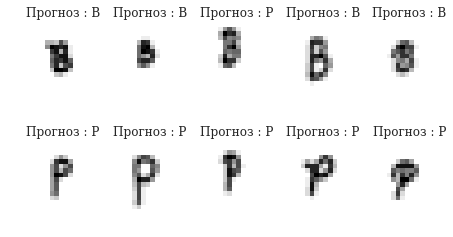

In [0]:
# %matplotlib notebook
%matplotlib inline

import matplotlib
matplotlib.rcParams['text.usetex'] = False

# pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
# matplotlib.rcParams.update(pgf_with_rc_fonts)

from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import numpy as np
from matplotlib import rc
# plt.rc('text', usetex = True )
plt.rc('font', family ='serif')



#Use previously created letters datasets
train_set = dataset
test_set = dataset_test

# Show and save 8 train images
images_and_labels = list(zip(train_set.data,train_set.target))
fig_train = plt.figure(8,(6 ,4))
for index, (image, label) in enumerate(images_and_labels[46:54]):
  plt.subplot(2, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation ='nearest')
  plt.title('Обучение: %c' % label )
plt.show()
# fig_train.savefig('train_result.eps', format = 'eps', dpi = 1000, pad_inches = 0.1)
fig_train.savefig('train_result.png', format = 'png', dpi = 100, pad_inches = 0.1)

# Flatten images, to turn the data in a ( samples , feature ) matrix
# Приведение массива точек изображений к одномерному виду
n_samples = len(train_set.data)
data = train_set.data.reshape((n_samples, -1))

# Different hidden layers settings
hl_4 = (128 ,64 ,16 ,4)
hl_3 = (128 ,32 ,8)
hl_2 = (64 ,8)

# Create a classifier : a multilayer perceptron classifier
classifier = MLPClassifier(hidden_layer_sizes = hl_4,
                           activation = 'relu',solver = 'sgd',
                           learning_rate_init = 1e-4, max_iter = 1000,
                           momentum = .9, tol = 1e-4, random_state = 1)

# Learn letters from the train dataset
classifier.fit(data, train_set.target )

# Приведение массива точек изображений к одномерному виду
n_samples_t = len(test_set.data)
data_t = test_set.data.reshape((n_samples_t, -1))

#Now predict the value of the lettets from the test dataset
predicted = classifier.predict(data_t)

# Load expected features
expected = test_set.target

# Print report and confusion matrix
print("Classification  report  for  classifier  %s:\n\n%s\n" %
       (classifier, metrics.classification_report(expected, predicted)))
print("Confusion   matrix :\n%s" %
      metrics.confusion_matrix(expected, predicted))

# Show and save 10 test images
images_and_predictions = list(zip(test_set.data, predicted))
fig_predict = plt.figure(8,(7.5 ,4))
for index, (image , prediction ) in enumerate(images_and_predictions):
  plt.subplot(2, 5, index +1)
  plt.axis('off')
  plt.imshow(image , cmap=plt.cm.gray_r, interpolation ='nearest')
  plt.title('Прогноз : %c' % prediction)
plt.show()
# fig_predict.savefig('predict_result_1.eps', format ='eps',dpi =1000)
fig_predict.savefig('predict_result_1.png', format ='png',dpi =100)


In [0]:
from IPython.display import Image
Image('train_result.png')

In [0]:
from IPython.display import Image
Image('predict_result_1.png')